In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/User/Downloads/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
x=df.drop(['sales'],1)
y=df['sales']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Assumptions in LINEAR REGRESSION

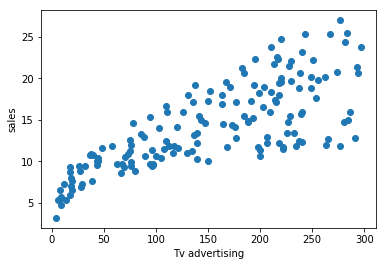

In [6]:
plt.scatter(x_train['TV'],y_train)
plt.xlabel('Tv advertising')
plt.ylabel("sales")
plt.show()

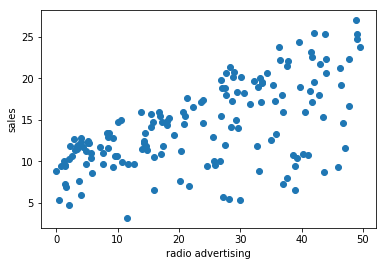

In [7]:
plt.scatter(x_train['radio'],y_train)
plt.xlabel('radio advertising')
plt.ylabel("sales")
plt.show()

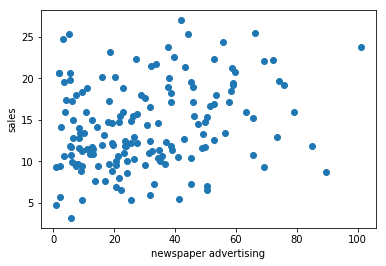

In [8]:
plt.scatter(x_train['newspaper'],y_train)
plt.xlabel('newspaper advertising')
plt.ylabel("sales")
plt.show()

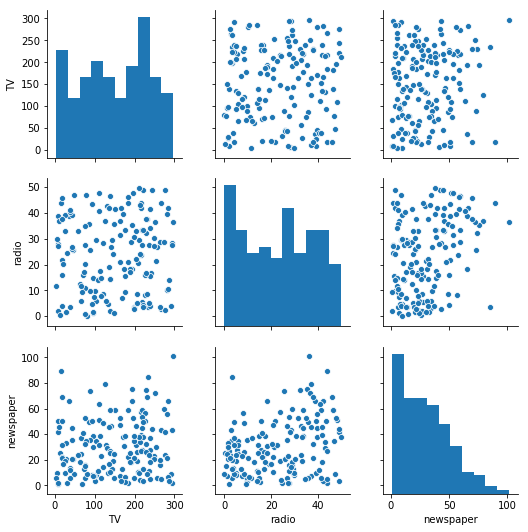

In [9]:
pair_plt=sns.pairplot(x_train)
pair_plt

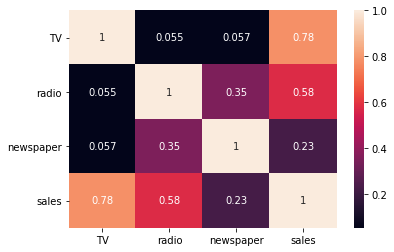

In [10]:
sns.heatmap(df.corr(),annot=True)

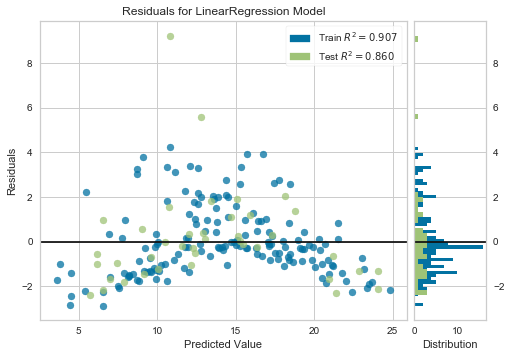

In [15]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
visualizer = ResidualsPlot(Lr)
visualizer.fit(x_train,y_train)     # Fit the training data to the model
visualizer.score(x_test,y_test)     # Evaluate the model on the test data
visualizer.poof() visualizer.poof() # Draw/show/poof the data

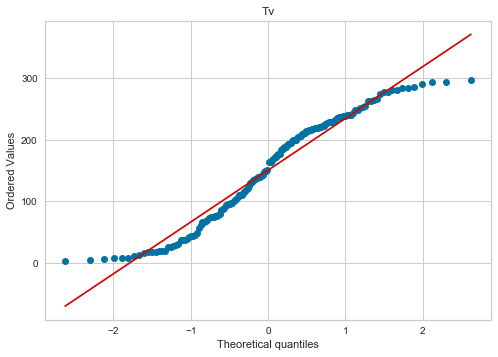

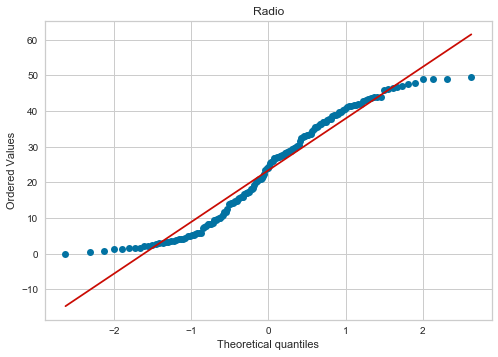

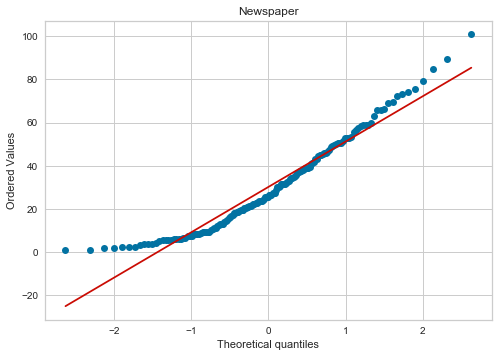

In [20]:
#checking normal distribution of features
from scipy import stats
import pylab 
stats.probplot(x_train['TV'], dist="norm", plot=pylab)
pylab.title("Tv")
pylab.show()
stats.probplot(x_train['radio'], dist="norm", plot=pylab)
pylab.title("Radio")
pylab.show()
stats.probplot(x_train['newspaper'], dist="norm", plot=pylab)
pylab.title("Newspaper")
pylab.show()

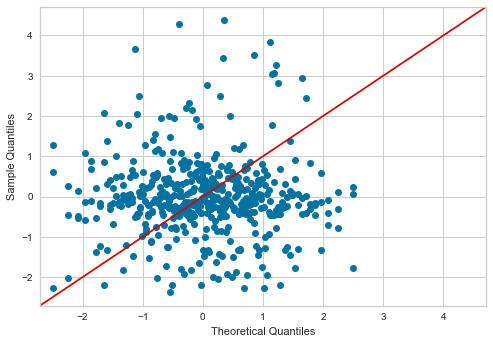

In [29]:
import statsmodels.api as sm
mod_fit = sm.OLS(x_train,y_train).fit()
res = mod_fit.resid # residuals
fig = sm.qqplot(res,fit=True,line='45')
plt.show()